## Gradient Descend for a function of one variable

Consider the function of one variable $f : \mathbb{R}\rightarrow\mathbb{R}$ and a few observations:

+ The local minimum point $x^*$ of a function is the point with derivative $f'(x^*) = 0$. Furthermore, in its neighborhood, the derivatives of points to the left of $x^*$ are non-positive, the derivatives of points to the right of $x^*$ are non-negative.
+ The line tangent to the graph of that function at any point has a slope equal to the derivative of the function at that point.

Suppose $x_t$ is the point found after the $t^{th}$ iteration. We need to find an algorithm to bring $x_t$ as close to $x^*$ as possible. There are two observations as follows:

1. If the derivative of the function at $x_t$ is positive $(f'(x_t) > 0)$ then $x_t$ is to the right compared to $x^*$, and vice versa. To make the next point $x_{t+1}$ closer to $x^*$, we need to move $x_t$ to the left, that is, to the negative side. In other words, we need to move **opposite to the derivative**:

$$x_{t+1} = x_t + \Delta$$

In which, $\Delta$ is a quantity with opposite sign to $f'(x_t)$.

2. The farther $x_t$ is from $x^*$ to the right, the larger $f'(x_t)$ is than $0$ (and vice versa). So, the amount of movement $\Delta$ is, most naturally, proportional to $-f'(x_t)$.

The two comments above give us a simple update

$$x_{t+1} = x_t - \eta f'(x_t)$$

In which, $\eta$ is a positive number called learning rate. The minus sign shows that we have to go against the derivative.

### Example in Python:

Considering the function

$$f(x) = x^2 + 5\sin(x)$$

We have the derivative of this function as

$$f'(x) = 2x + 5\cos(x)$$

Suppose starting from a certain point $x_0$, at the $t^{th}$ loop, we will update as follows:

$$x_{t+1} = x_t - \eta[2x_t + 5\cos(x_t)]$$

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# to calculate the derivative
def grad1(x):
    return 2 * x + 5 * np.cos(x)

def cost1(x):
    """ 
    To calculate the value of a function. 
    This function is not used in the algorithm but is often used to check whether the calculation of the derivative is correct 
    or to see if the value of the function decreases with each loop.
    """
    return x**2 + 5 * np.sin(x)

# to calculate the gradient descent
def myGD1(grad, x0, eta):
    x = [x0]
    for it in range(100):
        x_new = x[-1] - eta * grad(x[-1])
        if (abs(grad(x_new)) < 1e-3):
            break
        x.append(x_new)
    return (x, it)

In [3]:
(x1, it1) = myGD1(grad1, -5, .1)
(x2, it2) = myGD1(grad1, 5, .1)
print(f'Solution x1 =  {x1[-1]}, cost = {cost1(x1[-1])}, after {it1} iterations.')
print(f'Solution x2 =  {x2[-1]}, cost = {cost1(x2[-1])}, after {it2} iterations.')

Solution x1 =  -1.1106667365268623, cost = -3.2463941936103735, after 11 iterations.
Solution x2 =  -1.1103410483948122, cost = -3.246394179661889, after 29 iterations.


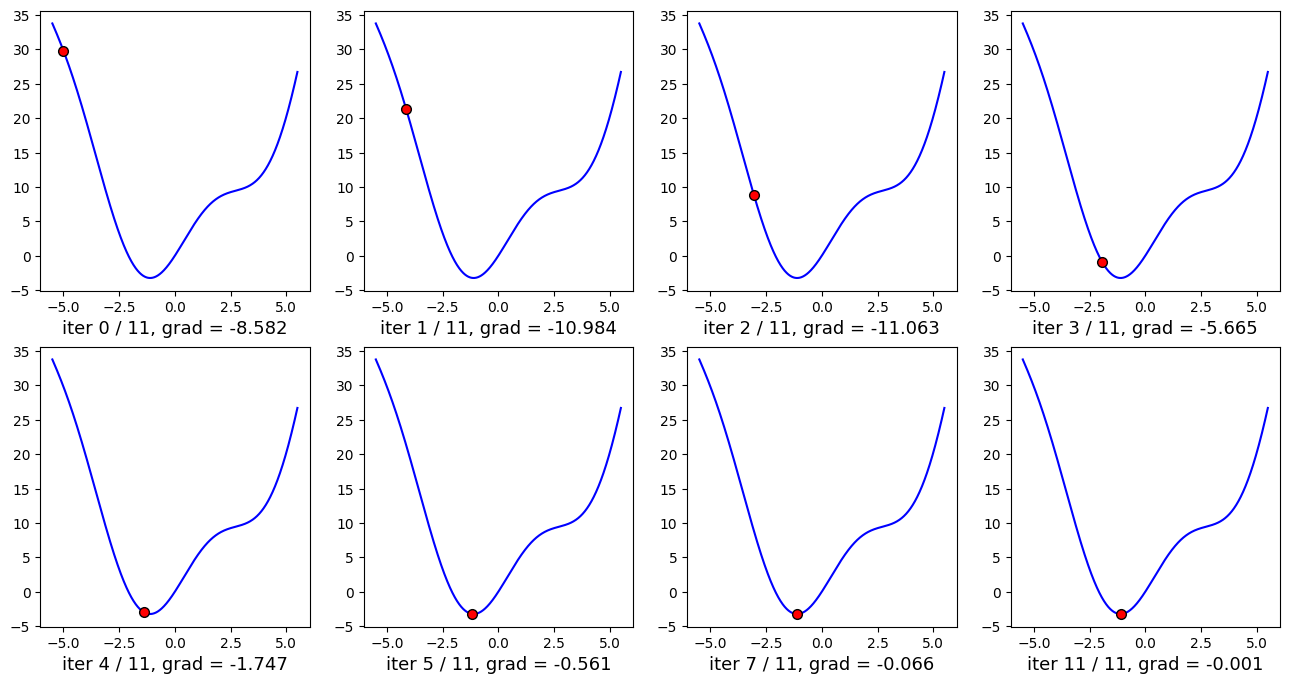

In [4]:
def draw_GD_1D(x1, ids, grad, cost, nrows=2, ncols=4, starts=-5.5, end=5.5):
    x0 = np.linspace(starts, end, 1000)
    y0 = cost(x0)

    fig, axs = plt.subplots(nrows, ncols, figsize=(4 * ncols, 4 * nrows))

    for i, k in enumerate(ids):
        r = i // ncols
        c = i % ncols

        x = x1[k]
        y = cost(x)
        str0 = 'iter {} / {}, grad = {:.3f}'.format(ids[i], len(x1) - 1, grad(x))

        if nrows > 1:
            axs[r, c].plot(x0, y0, 'b')
            axs[r, c].set_xlabel(str0, fontsize=13)
            axs[r, c].plot(x, y, 'ro', markersize=7, markeredgecolor='k')
            axs[r, c].plot()
        else: 
            axs[c].plot(x0, y0, 'b')
            axs[c].set_xlabel(str0, fontsize=13)
            axs[c].plot(x, y, 'ro', markersize=7, markeredgecolor='k')
            axs[c].plot()
    
    plt.show()

(x1, it0) = myGD1(grad1, -5, .1)
# print(len(x1))
ids = [0, 1, 2, 3, 4, 5, 7, 11]
draw_GD_1D(x1, ids, grad=grad1, cost=cost1)

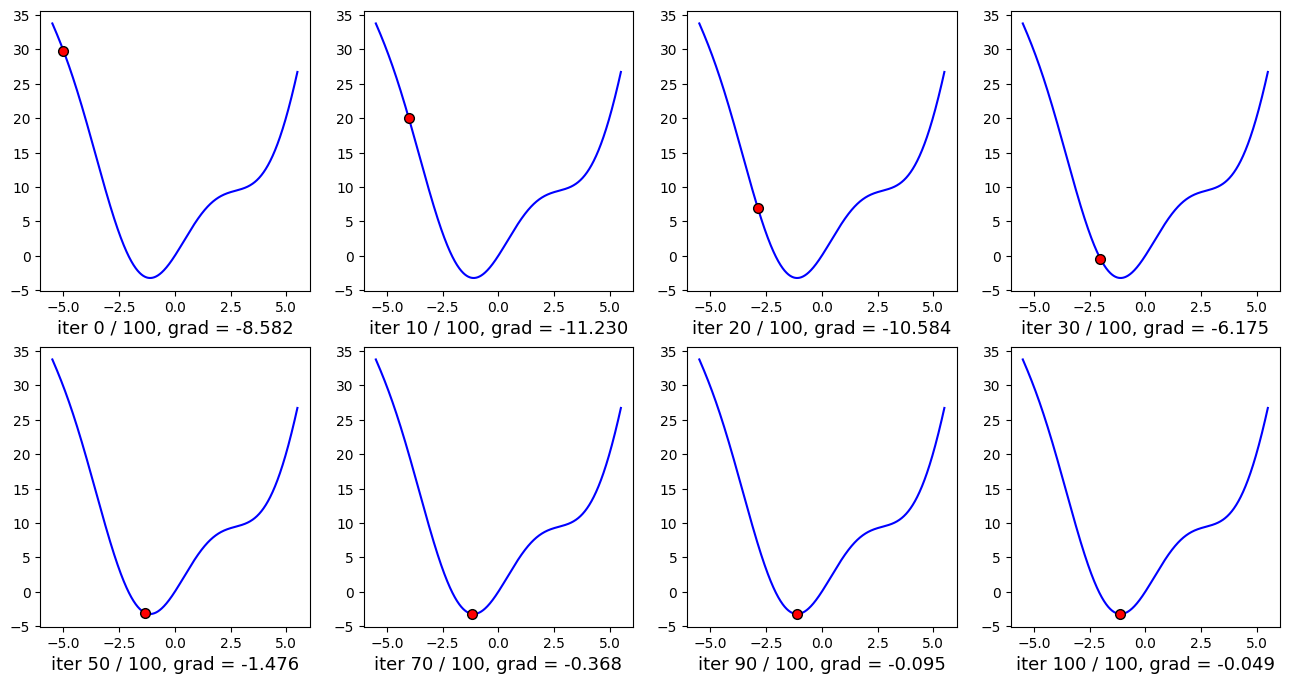

In [5]:
# small learning rate
(x1, it0) = myGD1(grad1, -5, .01)
ids = [0, 10, 20, 30, 50, 70,  90, 100]
draw_GD_1D(x1, ids, grad=grad1, cost=cost1)

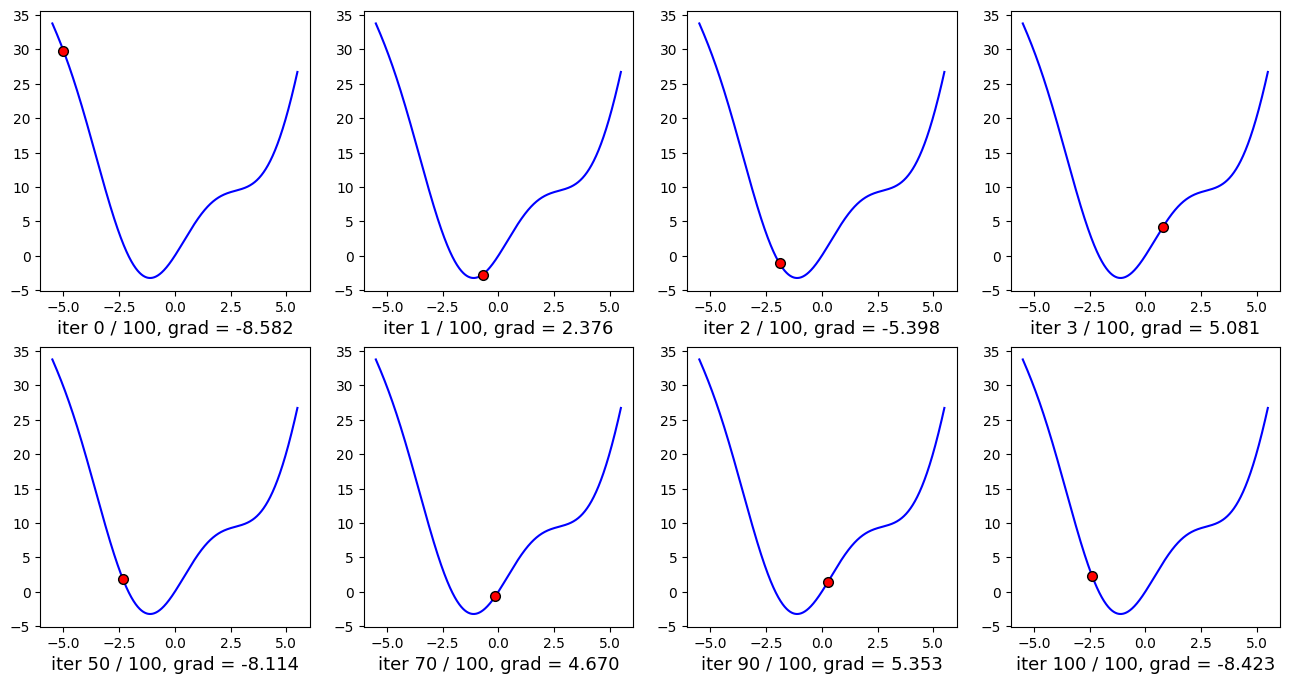

In [6]:
# large learning rate 
(x1, it0) = myGD1(grad1, -5, .5)
ids = [0, 1, 2, 3, 50, 70,  90, 100]
draw_GD_1D(x1, ids, grad=grad1, cost=cost1)

## Gradient descend for multivariable functions

Suppose we need to find the global minimum for the function $f(\theta)$ where $\theta$ is the set of parameters to be optimized. The derivative of that function at any point $\theta$ is denoted $\nabla_{\theta}f(\theta_t)$. The GD algorithm for a multivariable function also starts with a prediction point $\theta_0$ , then, in the $t^{th}$ loop, the update rule is

$$\theta_{t+1} = \theta_t - \eta\nabla_{\theta}f(\theta_t)$$

another way to write:

$$\theta_{t+1} \leftarrow \theta_t - \eta\nabla_{\theta}f(\theta_t)$$

### GD for linear regression:

We have a cost function as

$$\mathcal{L}(\textbf{w}) = \frac{1}{2N}||\textbf{y} - \textbf{X}^T\textbf{w}||_2^2$$

And we have the following derivative

$$\nabla_{\textbf{w}}\mathcal{L}(\textbf{w}) = \frac{1}{N}\textbf{X}(\textbf{X}^T\textbf{w} - \textbf{y})$$

For example:

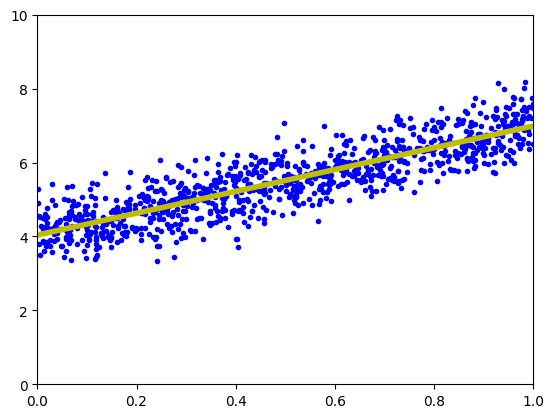

In [7]:
from sklearn.linear_model import LinearRegression

np.random.seed(0)

X = np.random.rand(1000)
y = 4 + 3 * X + .5 * np.random.randn(1000) # noise added

model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))

w, b = model.coef_[0][0], model.intercept_[0]

x0 = np.linspace(0, 1, 1000, endpoint=True)
y0 = w * x0 + b

plt.plot(X, y, 'b.')
plt.plot(x0, y0, 'y', linewidth=4)
plt.axis([0, 1, 0, 10])
plt.show()

In [8]:
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X.reshape(-1, 1)), axis = 1)

def grad2(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost2(w):
    N = Xbar.shape[0]
    return .5/N * np.linalg.norm(y - Xbar.dot(w))**2

def myGD(grad, w_init, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta * grad(w[-1])
        if np.linalg.norm(grad(w_new)) / len(w_new) < 1e-3:
            break 
        w.append(w_new)
    return (w, it)

w_init = np.array([2, 1])
(w1, it1) = myGD(grad2, w_init, 1)
print(f'Solution found by scikit-learn: [b, w] = {[b, w]}')
print(f'Solution found by GD: [b, w] = {w1[-1]}, after {it1 + 1} iterations.')
print(np.array(w1))

Solution found by scikit-learn: [b, w] = [4.038583624662032, 2.951481168762003]
Solution found by GD: [b, w] = [4.0535153  2.92338451], after 47 iterations.
[[2.         1.        ]
 [5.00636516 2.65571929]
 [4.18525831 2.27349113]
 [4.37481349 2.42475031]
 [4.2998008  2.43203111]
 [4.29619009 2.47410684]
 [4.27532383 2.50407197]
 [4.26046348 2.53448507]
 [4.24538097 2.56221969]
 [4.23162678 2.58827092]
 [4.21870741 2.61253619]
 [4.20667374 2.63519155]
 [4.19543846 2.65632966]
 [4.18495561 2.67605586]
 [4.17517297 2.69446346]
 [4.16604424 2.71164088]
 [4.15752559 2.72767025]
 [4.14957628 2.74262833]
 [4.14215824 2.75658671]
 [4.13523598 2.7696122 ]
 [4.12877636 2.78176715]
 [4.12274846 2.79310974]
 [4.11712343 2.80369426]
 [4.11187433 2.81357139]
 [4.10697606 2.82278839]
 [4.10240515 2.83138938]
 [4.09813973 2.83941554]
 [4.09415938 2.84690529]
 [4.09044506 2.85389446]
 [4.08697897 2.86041653]
 [4.08374454 2.8665027 ]
 [4.08072628 2.87218212]
 [4.07790973 2.87748195]
 [4.07528143 2.882

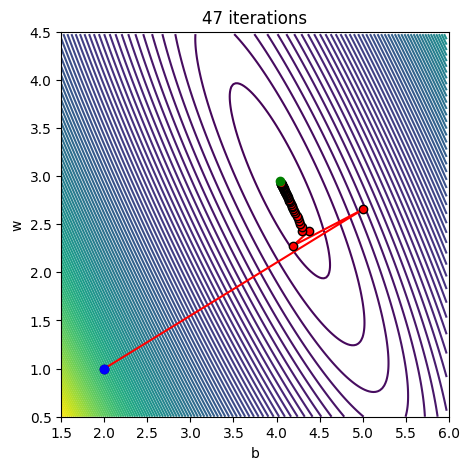

In [9]:
import matplotlib
import matplotlib.pyplot as plt

N = X.shape[0]

a1 = 0.5 * np.linalg.norm(y, 2)**2 / N
b1 = np.sum(X) / N
c1 = 0.5 * np.linalg.norm(X, 2)**2 / N
d1 = -np.sum(y) / N 
e1 = -X.T.dot(y) / N

delta = 0.025
bg = np.arange(1.5, 6.0, delta)
wg = np.arange(0.5, 4.5, delta)
Bg, Wg = np.meshgrid(bg, wg)
J_w = a1 + 0.5 * Bg**2 + b1 * Bg * Wg + c1 * Wg**2 + d1 * Bg + e1 * Wg

def lr_gd_draw(w1):
    w_hist = np.array(w1)
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.axis([1.5, 6, 0.5, 4.5])
    CS = plt.contour(Bg, Wg, J_w, 100)
    plt.plot(w_hist[:, 0], w_hist[:, 1], marker='o',color='r', linestyle='-', markeredgecolor='k')
    plt.plot(w_hist[0, 0], w_hist[0, 1], 'bo') # start point
    plt.plot(b, w, 'go') # end point
    plt.xlabel('b')
    plt.ylabel('w')
    plt.title(f'{w_hist.shape[0]} iterations')
    plt.show()

lr_gd_draw(w1)

Explain a little about the code above. Actually, this $Z$ equation is derived from the cost function of linear regression, specifically as follows:

$$\mathcal{L}(\textbf{w}) = \frac{1}{2N}||\textbf{y} - \textbf{X}^T\textbf{w}||_2^2 = \frac{1}{2N}\sum_{i=1}^{N}(y_i - (\textbf{x}_i^T\textbf{w} + b))^2$$

Considering $(y_i - (\textbf{x}_i^T\textbf{w} + b))^2$ we get the following:

$$(y_i - (\textbf{x}_i^T\textbf{w} + b))^2 = y_i^2 - 2y_i\textbf{x}_i^T\textbf{w} - 2y_ib + (\textbf{x}_i^T)^2\textbf{w}^2 + 2\textbf{x}_i^T\textbf{w}b + b^2$$

And next:

$$\sum_{i=1}^{N}(y_i - (\textbf{x}_i^T\textbf{w} + b))^2 = \sum_{i=1}^{N}y_i^2 - 2\textbf{w}\sum_{i=1}^{N}y_i\textbf{x}_i^T - 2b\sum_{i=1}^{N}y_i + \textbf{w}^2\sum_{i=1}^{N}(\textbf{x}_i^T)^2 + 2\textbf{w}b\sum_{i=1}^{N}\textbf{x}_i^T + b^2\sum_{i=1}^{N}1$$

And equals:

$$\sum_{i=1}^{N}(y_i - (\textbf{x}_i^T\textbf{w} + b))^2 = ||\textbf{y}||_2^2 - 2\textbf{w}\textbf{X}\textbf{y} - 2b\sum_{i=1}^{N}y_i + \textbf{w}^2||\textbf{X}||_2^2 + 2\textbf{w}b\sum_{i=1}^{N}\textbf{x}_i^T + Nb^2$$

Multiply $\frac{1}{2N}$ by both sides, we get

$$\frac{1}{2N}\sum_{i=1}^{N}(y_i - (\textbf{x}_i^T\textbf{w} + b))^2 = \frac{1}{2N}||\textbf{y}||_2^2 - \frac{1}{N}\textbf{w}\textbf{X}\textbf{y} - \frac{1}{N}b\sum_{i=1}^{N}y_i + \frac{1}{2N}\textbf{w}^2||\textbf{X}||_2^2 + \frac{1}{N}\textbf{w}b\sum_{i=1}^{N}\textbf{x}_i^T + \frac{1}{2}b^2$$

This equation corresponds to the coefficients declared above.

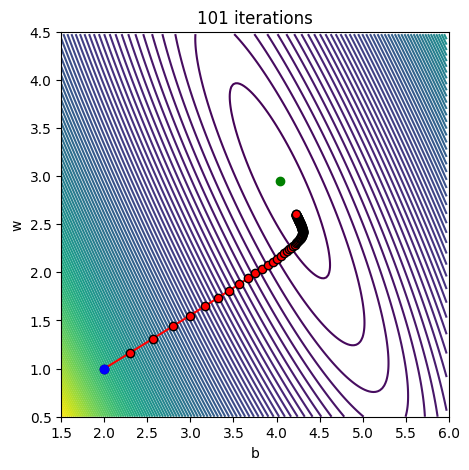

In [10]:
# with smaller learning rate
(w2, it2) = myGD(grad2, w_init, .1)
lr_gd_draw(w2)

## Gradient descent with momentum

Suppose we have local minimums as below, if the initial point velocity at the starting point is not large enough, it will be difficult for the point to move out of this local minimum position to reach the global minimum. On the contrary, if this velocity is large enough, then according to *momentum*, the ball can move to the global minimum point. This algorithm is called *momentum*.

![GDMomentumURL](https://gbhat.com/assets/gifs/sgd_with_momentum2.gif "GDMomentum")

In GD, we need to calculate the amount of change at time $t$ to update the new position of the solution. If we think of this quantity as the velocity $v_t$ in physics, the new position of the marble will be $\theta_{t+1} = \theta_t − v_t$, assuming that each loop is a unit. taste of time. The minus sign represents having to move against the derivative. The next thing is to calculate the quantity $v_t$ so that it both carries information about the slope (ie the derivative) and also carries information about the momentum, which is the previous velocity $v_{t-1}$ (with the assumption that the initial velocity $v_0 = 0$). In the simplest way, we can take their weighted sum:

$$v_t = \gamma v_{t-1} + \eta\nabla_{\theta}J(\theta)$$

Where $\gamma$ is usually chosen to be a smaller value close to one, usually around $0.9$, $v_{t-1}$ is the velocity at the previous time, $\nabla_{\theta}J (\theta)$ is the slope of the previous point. Then, the new position of the solution is determined by

$$\theta\leftarrow\theta - v_t = \theta - \eta\nabla_{\theta}J(\theta) - \gamma v_{t-1}$$

We will try to practice a small example of this algorithm. Consider a simple function with two local minima, one of which is the global minimum

$$f(x) = x^2 + 10sin(x)$$

In [11]:
def grad3(x):
    return 2 * x + 10 * np.cos(x)

def cost3(x):
    return x**2 + 10 * np.sin(x)

def GD_momentum(grad, theta_init, eta, gamma):
    # Suppose we want to store history of theta
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    for it in range(100):
        v_new = gamma * v_old + eta * grad(theta[-1])
        theta_new = theta[-1] - v_new
        if np.linalg.norm(grad(theta_new)) / np.array(theta_init).size < 1e-3:
            break
        theta.append(theta_new)
        v_old = v_new
    return theta 

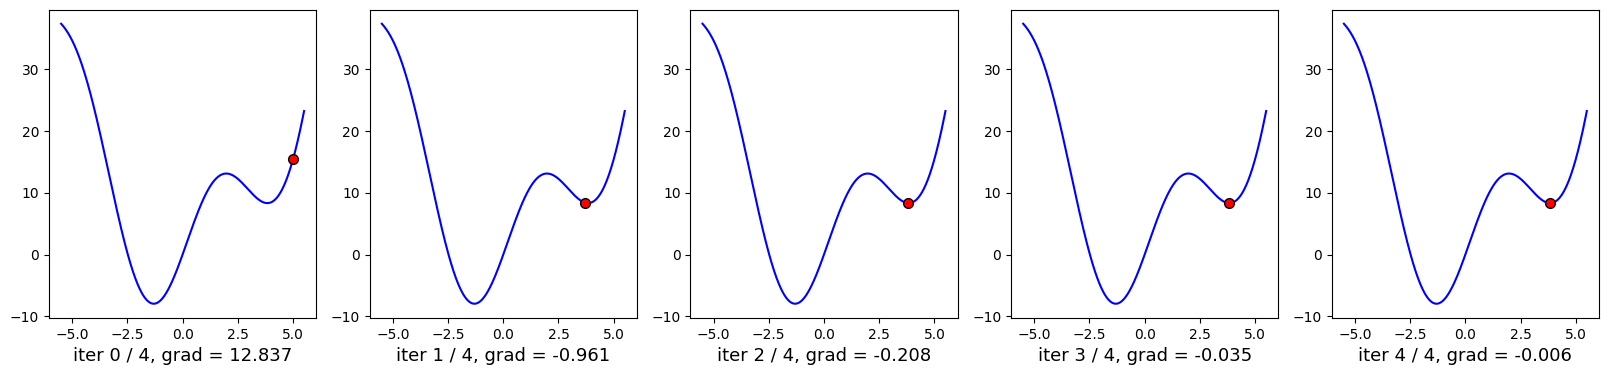

In [12]:
(thetas, it4) = myGD1(grad3, 5, .1)
ids = [0, 1, 2, 3, 4]
draw_GD_1D(thetas, ids, grad=grad3, cost=cost3, nrows=1, ncols=5)

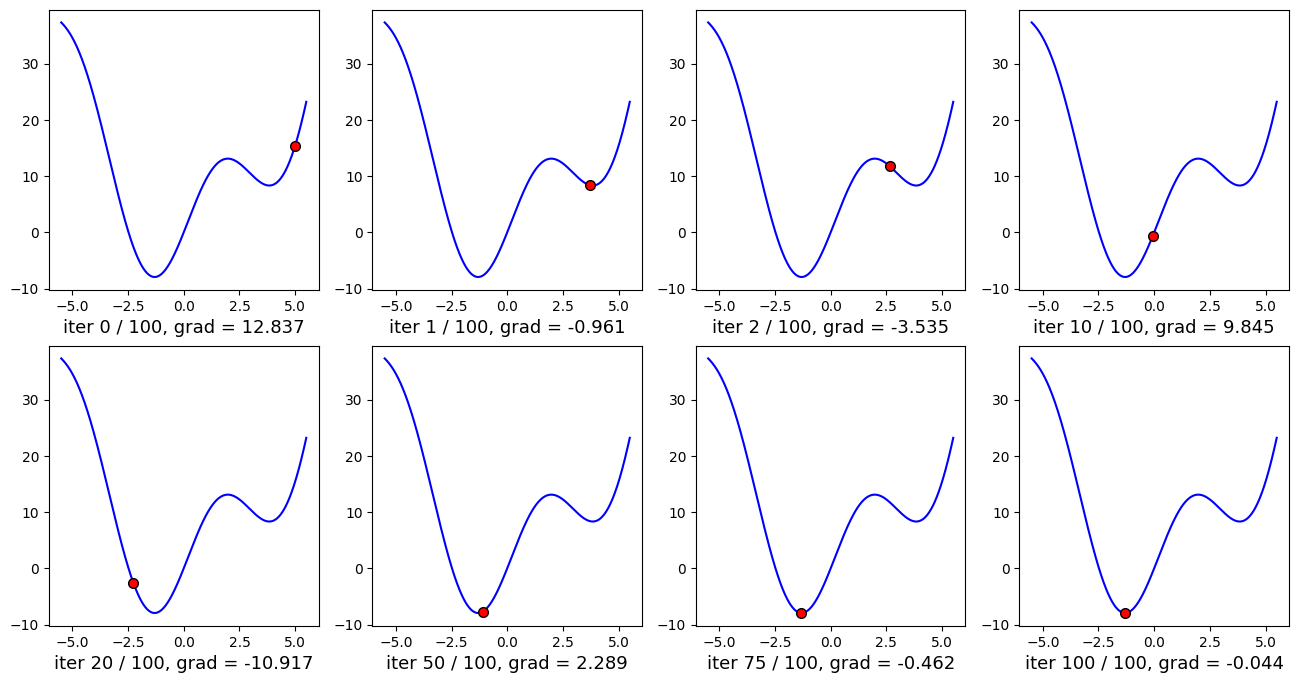

In [13]:
# good learning rate
thetas = GD_momentum(grad3, 5, .1, .9)
ids = [0, 1, 2, 10, 20, 50, 75, 100]
draw_GD_1D(thetas, ids, grad=grad3, cost=cost3)

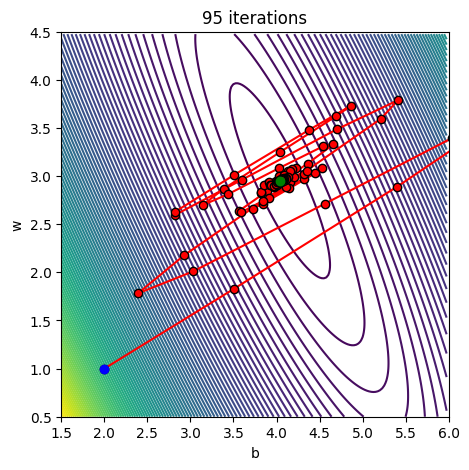

In [14]:
w3 = GD_momentum(grad2, w_init, .5, .9)
lr_gd_draw(w3)

## Nesterov accelerated gradient

Momentum helps the solution overcome the local minimum slope. However, there is a limitation we can see in the example above: when approaching the destination, momemtum still takes quite a while before stopping, also because of *momentum*. A technique called Nesterov accelerated gradient (NAG) helps the momentum GD algorithm converge faster.

The main idea of the NAG algorithm is to predict the location of the solution one step ahead. Specifically, if we use the momentum term $\gamma v_{t-1}$ to update, we can approximate the next position of the solution as $\theta − \gamma v_{t-1}$ . So, instead of using the gradient of the current point, NAG goes one step ahead, using the gradient of the point predicted to be the next location.

+ With normal momentum, the amount of change is the sum of two vectors: momentum vector and gradient at the present time.
+ With NAG, the amount of change is the sum of two vectors: the momentum vector and the gradient of the point predicted to be the next position.

The updated formula is:

$$v_t = \gamma v_{t-1} + \eta\nabla_{\theta}J(\theta - \gamma v_{t-1})$$
$$\theta\leftarrow\theta - v_t$$

In [15]:
def GD_NAG(grad, theta_init, eta, gamma):
    theta = [theta_init]
    v = [np.zeros_like(theta_init)]
    for it in range(100):
        v_new = gamma * v[-1] + eta * grad(theta[-1] - gamma * v[-1])
        theta_new = theta[-1] - v_new
        if np.linalg.norm(grad(theta_new)) / np.array(theta_init).size < 1e-3:
            break
        theta.append(theta_new)
        v.append(v_new)
    return theta

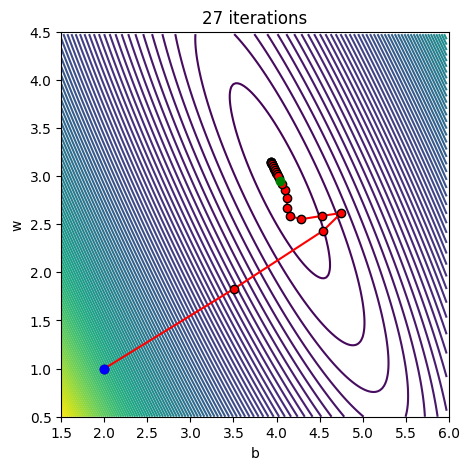

In [16]:
w4 = GD_NAG(grad2, w_init, .5, .9)
lr_gd_draw(w4)

Through the example of GD with normal momentum and NAG, we can see that with the normal momentum method, the path is quite zigzag and takes many iterations. In contrast, the solution using the NAG method converges faster and with fewer zigzags.

___
## **References:**

$[1].$ *Vũ Hữu Tiệp. Machine Learning cơ bản, Chapter 12, 2018.*

$[2].$ *DeepLearning.AI - Andrew Ng. Machine Learning Specialization, Supervised Machine Learning: Regression and Classification.*

$[3].$ *[Gajanan Bhat. Gradient Descent with Momentum.](https://gbhat.com/machine_learning/gradient_descent_with_momentum.html)*